# Data Cleaning

In [1]:
import pandas as pd
import json

In [2]:
players = pd.read_json("players.json")
players.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,null


In [3]:
players["country"] = players.apply(lambda x: x["passportArea"]["name"], axis = 1)
players["rol"] = players.apply(lambda x: x["role"]["name"], axis = 1)
players = players.drop(["passportArea", "role", "birthArea"], axis = 1)

players.head()

,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,wyId,foot,shortName,currentNationalTeamId,country,rol
0,78,Harun,,Tekin,4502,1989-06-17,187,32777,right,H. Tekin,4687,Turkey,Goalkeeper
1,73,Malang,,Sarr,3775,1999-01-23,182,393228,left,M. Sarr,4423,Senegal,Defender
2,72,Over,,Mandanda,3772,1998-10-26,176,393230,,O. Mandanda,null,France,Goalkeeper
3,82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,32793,right,A. N'Diaye,19314,Senegal,Midfielder
4,84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,393247,right,I. Konat\u00e9,null,France,Defender


In [4]:
england = pd.read_json("event/events_England.json")
england = england[england["subEventName"] == "Shot"]

In [6]:
eng = england.drop(["eventId", "eventName", "subEventId", "subEventName"], axis = 1)
eng["taglist"] = eng.apply(lambda x: [i["id"] for i in x["tags"]], axis = 1)
eng = eng.drop("tags", axis = 1) 

eng = eng.rename({"playerId": "wyId"}, axis = 1)

eng[["Goal", "Header", "Counter Attack", "Right Foot", "Blocked", "First Half", "X", "Y", "C", "Distance", "angle_degrees"]] = 0
eng.head()

,wyId,positions,matchId,teamId,matchPeriod,eventSec,id,taglist,Goal,Header,Counter Attack,Right Foot,Blocked,First Half,X,Y,C,Distance,angle_degrees
46,25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,1609,1H,94.595788,177959212,"[101, 402, 201, 1205, 1801]",0,0,0,0,0,0,0,0,0,0,0
62,26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",2499719,1631,1H,179.854785,177959247,"[401, 201, 1211, 1802]",0,0,0,0,0,0,0,0,0,0,0
91,14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,1631,1H,254.745027,177959280,"[101, 403, 201, 1207, 1801]",0,0,0,0,0,0,0,0,0,0,0
128,7868,"[{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]",2499719,1609,1H,425.824035,177959289,"[401, 201, 1215, 1802]",0,0,0,0,0,0,0,0,0,0,0
249,7868,"[{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]",2499719,1609,1H,815.462015,177959429,"[402, 201, 1205, 1801]",0,0,0,0,0,0,0,0,0,0,0


In [7]:
import numpy as np
def process_row(row): 
    """ 
    Process given row
    
    :param row: given row
    :type row: Pandas Series
    :returns: row 
    
    :type returns: Pandas Series
    
    """ 
    
    assert True 
    
    taglist = row["taglist"]
    
    if 403 in taglist: 
        row["Header"] = 1
        
    if 101 in taglist: 
        row["Goal"] = 1
        
    if 1901 in taglist: 
        row["Counter Attack"] = 1 
        
    if 2101 in taglist: 
        row["Blocked"] = 1 
    
    if 402 in taglist: 
        row["Right Foot"] = 1 
    
    if row['matchPeriod'] == "1H":
        row['First Half'] = 1

    row['X'] = 100 - row['positions'][0]['x']
    row['Y'] = row['positions'][0]['y']
    row['C'] = abs(row['positions'][0]['y'] - 50)
    
    x = row['X'] * 105 / 100
    y = row['C'] * 65 / 100
    row['Distance'] = np.sqrt(x ** 2 + y ** 2)
        
    angle = np.arctan(7.32 * x / (x ** 2 + y ** 2 - (7.32 / 2) ** 2))
        
    if angle < 0:
        angle = np.pi + angle
        
    row['angle_degrees'] = angle * 180 / np.pi
    
    return row

In [8]:
eng = eng.apply(process_row, axis = 1)
eng = eng.drop(["positions", "matchPeriod", "taglist"], axis = 1)
eng.head()

,wyId,matchId,teamId,eventSec,id,Goal,Header,Counter Attack,Right Foot,Blocked,First Half,X,Y,C,Distance,angle_degrees
46,25413,2499719,1609,94.595788,177959212,1,0,0,1,0,1,12,41,9,13.891814,27.184065
62,26150,2499719,1631,179.854785,177959247,0,0,0,0,0,1,15,52,2,15.803560,26.002161
91,14763,2499719,1631,254.745027,177959280,1,1,0,0,0,1,4,52,2,4.396590,79.074774
128,7868,2499719,1609,425.824035,177959289,0,0,0,0,0,1,19,33,17,22.805811,16.077018
249,7868,2499719,1609,815.462015,177959429,0,0,0,1,0,1,25,30,20,29.292704,12.815892


In [9]:
def strong(row): 
    """ 
    row strong foot or not 
    
    :param row: given row
    :type row: pandas series
    :returns: is strong foot or not 
    
    :type returns: boolean integer
    
    """ 
    
    assert True 
    
    if ((row["Right Foot"] == 1) and (row["foot"] == "right")): 
        return 1
    elif ((row["Right Foot"] == 0) and (row["foot"] == "left")): 
        return 1
    else: 
        return 0

In [10]:
engplay = eng.merge(players, on = "wyId")
engplay["strong foot"] = engplay.apply(strong, axis = 1) 
engplay.head()

,wyId,matchId,teamId,eventSec,id,Goal,Header,Counter Attack,Right Foot,Blocked,...,lastName,currentTeamId,birthDate,height,foot,shortName,currentNationalTeamId,country,rol,strong foot
0,25413,2499719,1609,94.595788,177959212,1,0,0,1,0,...,Lacazette,1609,1991-05-28,175,right,A. Lacazette,null,Guadeloupe,Forward,1
1,25413,2499719,1609,2813.844402,177960131,0,0,0,1,1,...,Lacazette,1609,1991-05-28,175,right,A. Lacazette,null,Guadeloupe,Forward,1
2,25413,2499719,1609,2354.807116,177960899,0,0,0,0,0,...,Lacazette,1609,1991-05-28,175,right,A. Lacazette,null,Guadeloupe,Forward,0
3,25413,2499743,1609,1404.650587,182608914,0,0,0,1,0,...,Lacazette,1609,1991-05-28,175,right,A. Lacazette,null,Guadeloupe,Forward,1
4,25413,2499749,1609,1616.714627,185785147,1,0,0,1,0,...,Lacazette,1609,1991-05-28,175,right,A. Lacazette,null,Guadeloupe,Forward,1


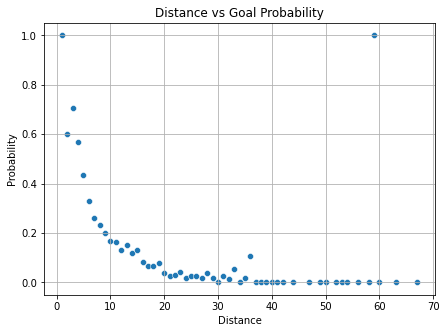

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (7, 5))

engplay["rounded_distance"] = engplay.apply(lambda x: np.round(x["Distance"]), axis = 1) 

sns.scatterplot(x ="rounded_distance", y = "Goal", data = pd.DataFrame(engplay.groupby("rounded_distance").agg("mean")["Goal"]).reset_index())
plt.xlabel('Distance')
plt.ylabel('Probability')

plt.grid()
plt.title('Distance vs Goal Probability')
plt.show()